# Project ML
### Project goals:
##### The goal of this project is to predict the rating of computer games (pct_pos_total) based on other features (e.g., their genre, publisher, release date etc.)
###### some analysis of the dataset (e.g., statistics regarding its size or the distribution of individual features)
###### details on any preprocessing that you applied to the dataset (e.g., to clean it up by removing null values)
###### a detailed description of your approach (e.g., which method to do you use, which features do you consider)
###### a discussion of the experimental results (e.g., what is the performance that your achieves, how does it compare to other methods)

###### Dataset : https://www.kaggle.com/datasets/artermiloff/steam-games-dataset?resource=download

Initial setup & imports 


In [70]:
import pandas as pd 
import matplotlib as mpl
from sklearn.model_selection import train_test_split



df = pd.read_csv(r"C:\Users\gianl\.vscode\Coding\Python\games_may2024_cleaned.csv",encoding='ISO-8859-1')

print(df.columns)

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')


In [71]:
df.isnull().sum()

AppID                           0
name                            3
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          166
about_the_game                188
short_description             109
reviews                     73363
header_image                    0
website                     43886
support_url                 41565
support_email               10579
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              79706
achievements                    0
recommendations                 0
notes                       69437
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

Cleaning up DataSet by removing columns where null values count is high, where name is missing

In [72]:
df['name']=df['name'].fillna('X')

df = df.drop(['score_rank','notes','metacritic_url', 'website','support_url','support_email','reviews','detailed_description','about_the_game','short_description'], axis=1)
df.head(5)

,AppID,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,True,...,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,...,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,True,...,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,359550,Tom Clancy's Rainbow SixÂ® Siege,2015-12-01,17,19.99,9,https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,...,16213,578,3016,331,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566


Removing irrelevant columns towards the analysis goal

In [73]:
df = df.drop(['AppID','header_image','screenshots','movies'], axis=1)
print(df.columns)

Index(['name', 'release_date', 'required_age', 'price', 'dlc_count', 'windows',
       'mac', 'linux', 'metacritic_score', 'achievements', 'recommendations',
       'supported_languages', 'full_audio_languages', 'packages', 'developers',
       'publishers', 'categories', 'genres', 'user_score', 'positive',
       'negative', 'estimated_owners', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'peak_ccu', 'tags', 'pct_pos_total',
       'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')


## Basic Analysis of the DataSet

In [74]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      83646 non-null  object 
 1   release_date              83646 non-null  object 
 2   required_age              83646 non-null  int64  
 3   price                     83646 non-null  float64
 4   dlc_count                 83646 non-null  int64  
 5   windows                   83646 non-null  bool   
 6   mac                       83646 non-null  bool   
 7   linux                     83646 non-null  bool   
 8   metacritic_score          83646 non-null  int64  
 9   achievements              83646 non-null  int64  
 10  recommendations           83646 non-null  int64  
 11  supported_languages       83646 non-null  object 
 12  full_audio_languages      83646 non-null  object 
 13  packages                  83646 non-null  object 

In [75]:

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())



Descriptive Statistics for Numerical Columns:
       required_age         price     dlc_count  metacritic_score  \
count  83646.000000  83646.000000  83646.000000      83646.000000   
mean       0.276403      7.492446      0.580542          3.451080   
std        2.119835     13.094604     14.179160         15.685104   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.990000      0.000000          0.000000   
50%        0.000000      4.990000      0.000000          0.000000   
75%        0.000000      9.990000      0.000000          0.000000   
max       21.000000    999.980000   3165.000000         97.000000   

       achievements  recommendations    user_score      positive  \
count  83646.000000     8.364600e+04  83646.000000  8.364600e+04   
mean      20.702735     1.003478e+03      0.037467  1.276726e+03   
std      167.839222     2.108173e+04      1.737074  3.057663e+04   
min        0.000000     0.000000e+00      0.000000  0.00000

In [76]:
print("\nDistribution of 'required_age':")
print(df['required_age'].value_counts().sort_index())
df_req_age_21= df[df['required_age'] == 21]
df_req_age_21


Distribution of 'required_age':
required_age
0     82218
1         1
3         7
5         2
6         4
7         7
10       30
12       30
13      191
14        4
15        8
16       63
17      786
18      289
20        2
21        4
Name: count, dtype: int64


,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
2801,Booty Calls,2018-09-18,21,0.00,4,True,True,False,0,30,...,2501,325,157,619,57,"{'Nudity': 166, 'Sexual Content': 164, 'Free t...",57,3631,72,18
54885,Yet Another Waveshooter,2019-07-12,21,4.99,0,True,False,False,0,0,...,0,0,0,0,0,"{'Action': 21, 'Casual': 21, 'VR': 13, 'Shoote...",-1,-1,-1,-1
60027,Hades Ultimate Fighting Ball,2020-03-31,21,5.99,0,True,False,False,0,0,...,0,0,0,0,0,"{'Action': 157, 'Sports': 157, 'Indie': 156, '...",-1,-1,-1,-1
74907,Top Fun 10 VR,2022-09-10,21,0.99,0,True,False,False,0,0,...,0,0,0,0,0,"{'Action': 69, 'Action RPG': 43, 'Action-Adven...",-1,-1,-1,-1


## Adjusting Data to a fitting format 

In [77]:
print(df.iloc[0]['categories'])

['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV']


### Changing lists of Categories and Tags to seperate features of the first 3 values respectivly


In [78]:
import re

def get_first_three_genres(tag_string):
    
    matches = re.findall(r"\'(.*?)\'\s*:\s*\d+", tag_string)
    top_tags = matches[:3]
    return top_tags + [None] * (3 - len(top_tags))

df[['genre1', 'genre2', 'genre3']] = df['tags'].apply(lambda x: pd.Series(get_first_three_genres(x)))

df.drop(columns=['tags'], inplace=True)



In [79]:
import ast

df['categories'] = df['categories'].apply(ast.literal_eval)

def extract_first_three_categories(category_list):
    return category_list[:3] + [None] * (3 - len(category_list))

df[['categorie1', 'categorie2', 'categorie3']] = pd.DataFrame(df['categories'].apply(extract_first_three_categories).tolist(), index=df.index)

df = df.drop(columns=['categories'])


refactor date

In [80]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

df.head()

,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,...,num_reviews_total,pct_pos_recent,num_reviews_recent,genre1,genre2,genre3,categorie1,categorie2,categorie3,release_year
0,Counter-Strike 2,2012-08-21,0,0.00,1,True,False,True,0,1,...,8071426,80,56072,FPS,Shooter,Multiplayer,Multi-player,Cross-Platform Multiplayer,Steam Trading Cards,2012
1,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,True,False,False,0,37,...,2365012,68,19517,Survival,Shooter,Battle Royale,Multi-player,PvP,Online PvP,2017
2,Dota 2,2013-07-09,0,0.00,2,True,True,True,90,0,...,2247365,71,23832,Free to Play,MOBA,Multiplayer,Multi-player,Co-op,Steam Trading Cards,2013
3,Grand Theft Auto V,2015-04-13,17,0.00,1,True,False,False,96,77,...,1643791,92,16181,Open World,Action,Multiplayer,Single-player,Multi-player,PvP,2015
4,Tom Clancy's Rainbow SixÂ® Siege,2015-12-01,17,19.99,9,True,False,False,0,0,...,1091695,77,10566,FPS,PvP,e-sports,Single-player,Multi-player,PvP,2015


Transforming Categorical Data to Numerical 

In [81]:
genre1_mean_rating = df.groupby('genre1')['pct_pos_total'].transform('mean')
df['genre1_mean_rating'] = genre1_mean_rating

genre2_mean_rating = df.groupby('genre2')['pct_pos_total'].transform('mean')
df['genre2_mean_rating'] = genre2_mean_rating

genre3_mean_rating = df.groupby('genre3')['pct_pos_total'].transform('mean')
df['genre3_mean_rating'] = genre3_mean_rating

categorie1_mean_rating = df.groupby('categorie1')['pct_pos_total'].transform('mean')
df['categorie1_mean_rating'] = categorie1_mean_rating

categorie2_mean_rating = df.groupby('categorie2')['pct_pos_total'].transform('mean')
df['categorie2_mean_rating'] = categorie2_mean_rating

categorie3_mean_rating = df.groupby('categorie3')['pct_pos_total'].transform('mean')
df['categorie3_mean_rating'] = categorie3_mean_rating

publisher_mean_rating = df.groupby('publishers')['pct_pos_total'].transform('mean')
df['publishers_mean_rating'] = publisher_mean_rating

release_year_mean_rating = df.groupby('release_year')['pct_pos_total'].transform('mean')
df['release_year_mean_rating'] = release_year_mean_rating

df.head()


,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,...,categorie3,release_year,genre1_mean_rating,genre2_mean_rating,genre3_mean_rating,categorie1_mean_rating,categorie2_mean_rating,categorie3_mean_rating,publishers_mean_rating,release_year_mean_rating
0,Counter-Strike 2,2012-08-21,0,0.00,1,True,False,True,0,1,...,Steam Trading Cards,2012,52.803763,35.250000,62.656743,46.133471,49.816327,73.850781,86.571429,74.617284
1,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,True,False,False,0,37,...,Online PvP,2017,55.414141,35.250000,23.170732,46.133471,42.907995,46.598990,68.750000,48.950773
2,Dota 2,2013-07-09,0,0.00,2,True,True,True,90,0,...,Steam Trading Cards,2013,70.519562,38.904762,62.656743,46.133471,47.900000,73.850781,86.571429,73.698073
3,Grand Theft Auto V,2015-04-13,17,0.00,1,True,False,False,96,77,...,PvP,2015,64.572464,46.835076,62.656743,46.834588,52.680968,49.917812,80.000000,62.111899
4,Tom Clancy's Rainbow SixÂ® Siege,2015-12-01,17,19.99,9,True,False,False,0,0,...,PvP,2015,52.803763,46.975207,42.638889,46.834588,52.680968,49.917812,74.466165,62.111899


## Cleaning up Data 

 #### 2 Options: 
 #### Droping all NaN-Rows 
 #### OR : 
 #### Set all NaN-Values to 45

In [82]:
print(df.isna().sum())

name                            0
release_date                    0
required_age                    0
price                           0
dlc_count                       0
windows                         0
mac                             0
linux                           0
metacritic_score                0
achievements                    0
recommendations                 0
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
genres                          0
user_score                      0
positive                        0
negative                        0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
median_playtime_forever         0
median_playtime_2weeks          0
peak_ccu                        0
pct_pos_total                   0
num_reviews_total               0
pct_pos_recent                  0
num_reviews_re

Dropping data due to better accuracy

In [83]:
#df = df.fillna(45)
df = df.dropna()

DataSet Splitting 

    - 60% train_data
    - 20% val_data
    - 20% test_data

In [84]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (29991, 45)
Validation data shape: (9998, 45)
Test data shape: (9998, 45)


Features & Target seperated

In [85]:
features = ['release_year_mean_rating', 'publishers_mean_rating', 'categorie3_mean_rating', 'categorie2_mean_rating', 'categorie1_mean_rating', 'genre3_mean_rating', 'genre2_mean_rating', 'genre1_mean_rating']

In [86]:
X_train = train_data[features]
y_train = train_data['pct_pos_total']

X_val = val_data[features]
y_val = val_data['pct_pos_total']

X_test = test_data[features]
y_test = test_data['pct_pos_total']


##  Model fitting


In [87]:
from sklearn.linear_model import LinearRegression


Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
Linear_model_pred = Linear_model.predict(X_test)


In [88]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model_pred = ridge_model.predict(X_test)

In [89]:
from sklearn.ensemble import RandomForestRegressor

rdm_forest_model = RandomForestRegressor()
rdm_forest_model.fit(X_train, y_train)
rdm_forest_model_pred = rdm_forest_model.predict(X_test)

Sample of Linear, Ridge and RFR model

In [90]:
import pandas  as pd
results_lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': Linear_model_pred})
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_model_pred})
results_rdmf_df = pd.DataFrame({'Actual': y_test, 'Predicted': rdm_forest_model_pred})

print("Linear Regression \n", results_lin_df[0:11])
print("Ridge Regression \n",results_df[0:11])
print("Random Forest Regressor \n", results_rdmf_df[0:11])

Linear Regression 
        Actual  Predicted
23882      89  91.210856
46554      83  64.289815
80280      -1   0.258074
26477      74  58.776621
27139      80  40.113550
11022      83  42.223998
2028       85  95.200568
48156      18  17.863168
31972      68  65.926306
37601      80  70.433705
35393      92  90.884550
Ridge Regression 
        Actual  Predicted
23882      89  91.210855
46554      83  64.289814
80280      -1   0.258075
26477      74  58.776621
27139      80  40.113550
11022      83  42.223998
2028       85  95.200566
48156      18  17.863169
31972      68  65.926306
37601      80  70.433704
35393      92  90.884549
Random Forest Regressor 
        Actual  Predicted
23882      89    89.1500
46554      83    64.1825
80280      -1    -1.0000
26477      74    51.6175
27139      80    57.8900
11022      83    37.0300
2028       85    85.1700
48156      18    20.2400
31972      68    68.0100
37601      80    65.8100
35393      92    91.8000


## Further enhance performace of the random-forest by tuning hyperparameter

train the model with each combination of hyperparameter and evaluate its performance on the validation set

In [91]:
from sklearn.model_selection import  GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [92]:
grid_search = GridSearchCV(rdm_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

select the best performing combination

In [93]:

best_model = grid_search.best_estimator_

val_predictions = best_model.predict(X_val)
val_score = best_model.score(X_val, y_val)

In [94]:
test_predictions = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
print(f"Validation Score: {val_score}")
print(f"Test Score: {test_score}")


Validation Score: 0.7851974835854387
Test Score: 0.7908477196330467


## Model evaluation

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('mean square error (linear): ' , mean_squared_error(y_test, Linear_model_pred))
print('mean abs error (linear): ' , mean_absolute_error(y_test, Linear_model_pred))
print('mean square error (ridge): ' , mean_squared_error(y_test, ridge_model_pred))
print('mean abs error (ridge): ' , mean_absolute_error(y_test, ridge_model_pred))

mean square error (linear):  329.47982915843914
mean abs error (linear):  10.707001183912254
mean square error (ridge):  329.4798288721494
mean abs error (ridge):  10.70700122077056


In [96]:

mse = mean_squared_error(y_test, rdm_forest_model_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, rdm_forest_model_pred)
r2 = r2_score(y_test, rdm_forest_model_pred)

mse_= mean_squared_error(y_test, test_predictions)
rmse_ = mse_ ** 0.5
mae_ = mean_absolute_error(y_test, test_predictions)
r2_ = r2_score(y_test, test_predictions)

summary_table = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse, rmse, mae, r2]
})
summary_table_ = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse_, rmse_, mae_, r2_]
})

print("RFR without Validation \n",summary_table)
print("RFR with Validation \n",summary_table_)


RFR without Validation 
                     Metric       Value
0       Mean Squared Error  334.016492
1  Root Mean Squared Error   18.276118
2      Mean Absolute Error   10.187684
3                R-squared    0.781323
RFR with Validation 
                     Metric       Value
0       Mean Squared Error  319.467663
1  Root Mean Squared Error   17.873658
2      Mean Absolute Error    9.879033
3                R-squared    0.790848


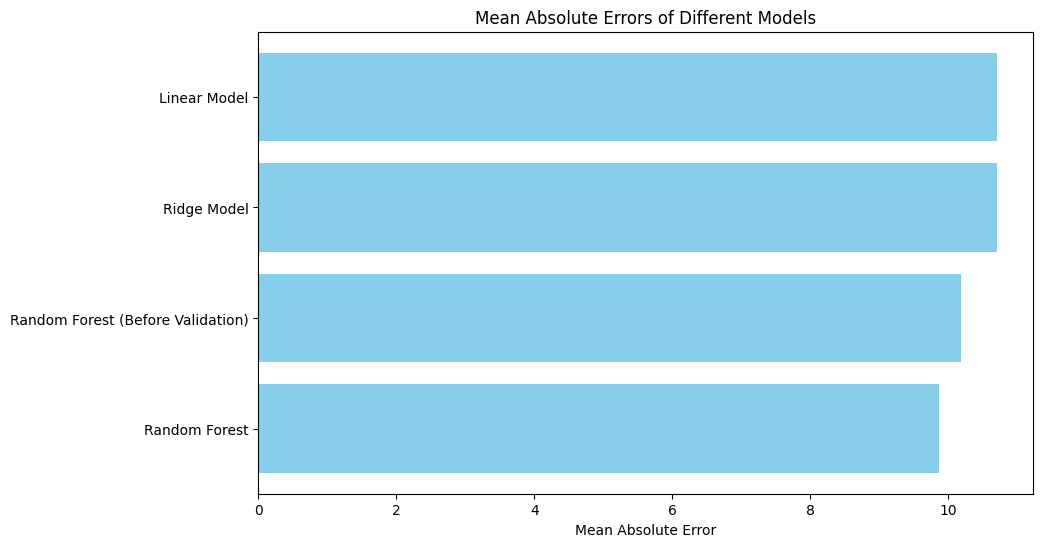

In [97]:
import matplotlib.pyplot as plt

mean_abs_errors = {
    'Linear Model': mean_absolute_error(y_test, Linear_model_pred), 
    'Ridge Model': mean_absolute_error(y_test, ridge_model_pred),
    'Random Forest (Before Validation)': mean_absolute_error(y_test, rdm_forest_model_pred),
    'Random Forest': mean_absolute_error(y_test, test_predictions)
}

models = list(mean_abs_errors.keys())
errors = list(mean_abs_errors.values())

plt.figure(figsize=(10, 6))
plt.barh(models, errors, color='skyblue')
plt.xlabel('Mean Absolute Error')
plt.title('Mean Absolute Errors of Different Models')
plt.gca().invert_yaxis() 
plt.show()